## Linear vs Poly

### Import & data

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv("Advertising.csv")

In [137]:
df.head() # bu veride televizyona verilen reklamlar, radyoya verilen reklamlar ve gazeteye verilen reklamlar sonucu satışı gözlemliycez

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA (exploratory data analysis)

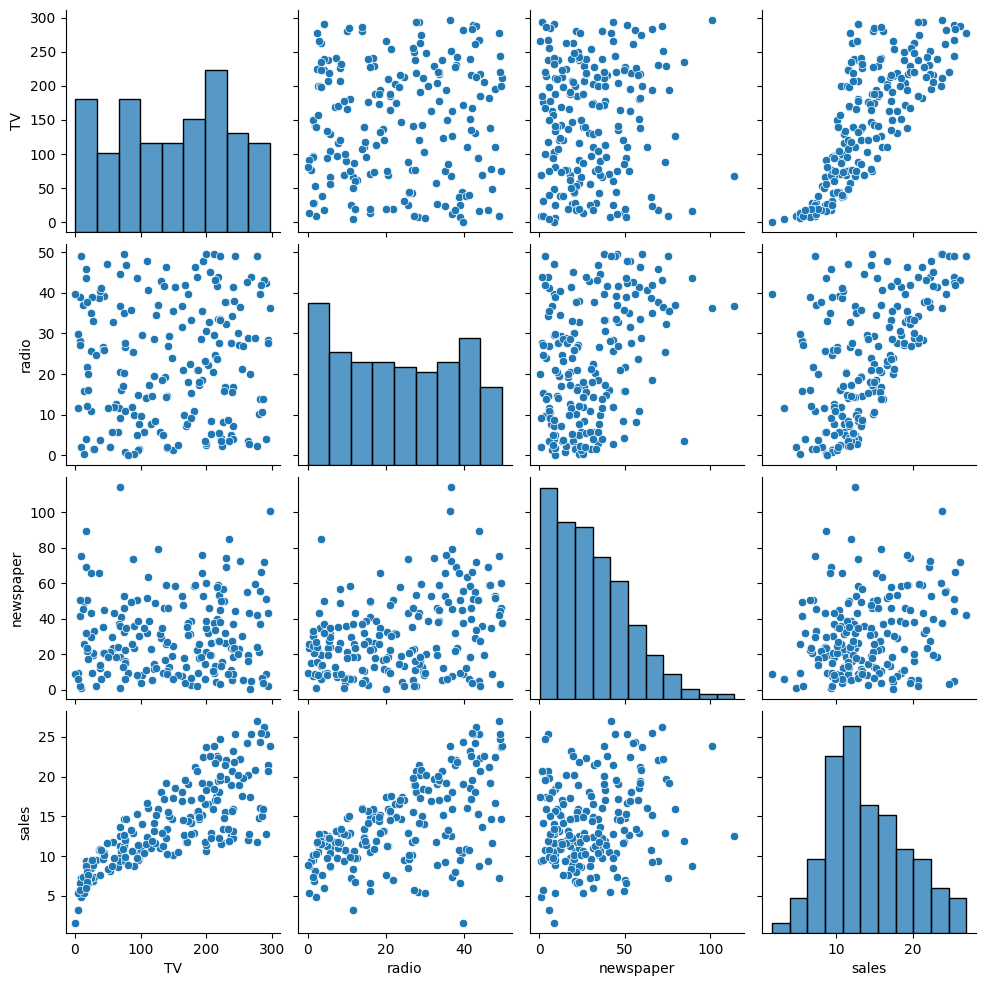

In [138]:
sns.pairplot(df)

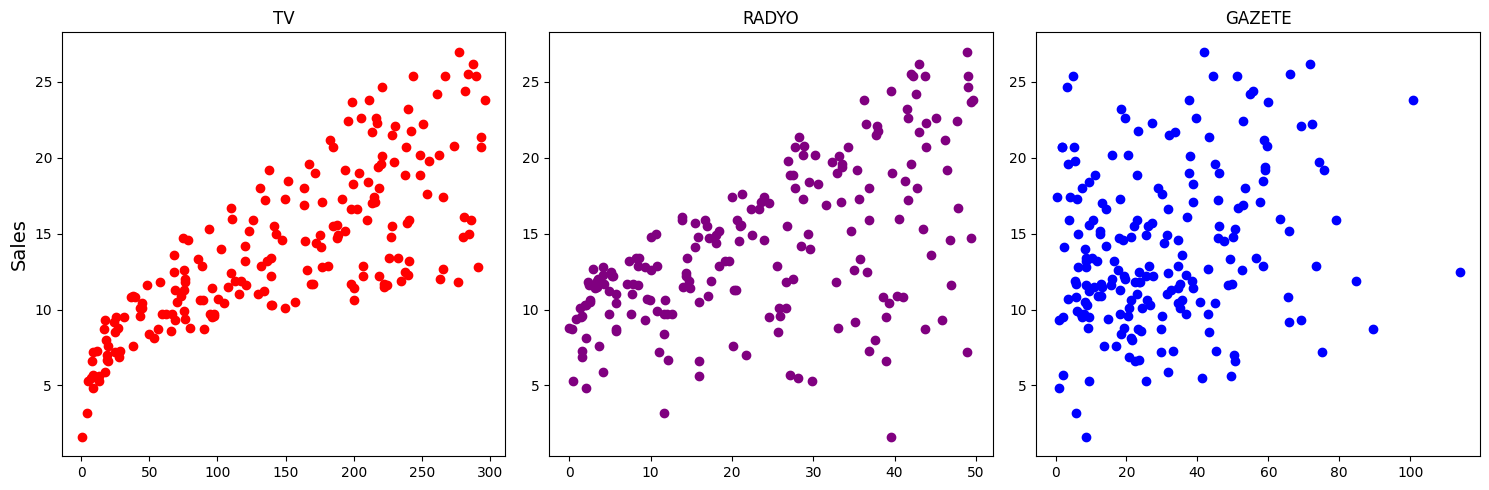

In [139]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="purple")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].set_title("GAZETE")

plt.tight_layout()

## np.polyfit()

In [140]:
X = df["TV"]
y = df["sales"]

In [141]:
harcamalar = np.linspace(0,300,100) # 0 dan 300 e kadar doğrusal sayı ürettik

### 1. derece

In [142]:
np.polyfit(X,y,1) # X ve y yi kullanarak 1. dereceden bir polinom oluştur.

array([0.04753664, 7.03259355])

In [143]:
# 0.04 ve 7.03 ile başlayan bu sayilar aslında ax + b nin a sı ve b si 

In [144]:
satis = 0.04753664 * harcamalar + 7.03259355

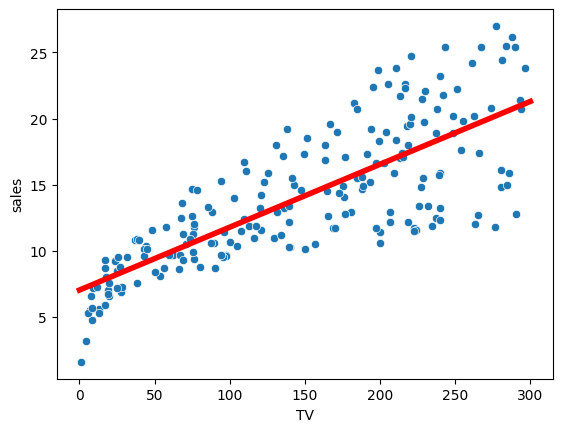

In [145]:
sns.scatterplot(df,x="TV",y="sales")
plt.plot(harcamalar, satis,c="red", lw=4)

### 2.derece

In [146]:
np.polyfit(X,y,2)

array([-6.84693373e-05,  6.72659270e-02,  6.11412013e+00])

ax^2 + bx + c

In [147]:
satis = -6.84693373e-05 * harcamalar**2 + 6.72659270e-02*harcamalar + 6.11412013e+00

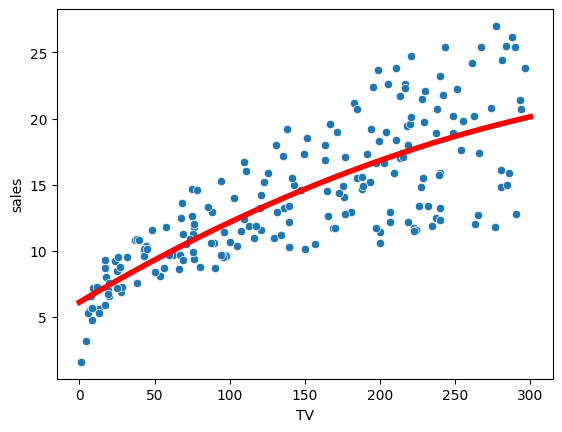

In [148]:
sns.scatterplot(df,x="TV",y="sales")
plt.plot(harcamalar, satis,c="red", lw=4)

### 3.derece

In [149]:
np.polyfit(X,y,3)

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

ax^3 + bx^2 + cx + d

In [150]:
satis = 5.57199796e-07 * harcamalar**3 + -3.15222433e-04 * harcamalar**2 + 9.64341770e-02 * harcamalar + 5.42010655

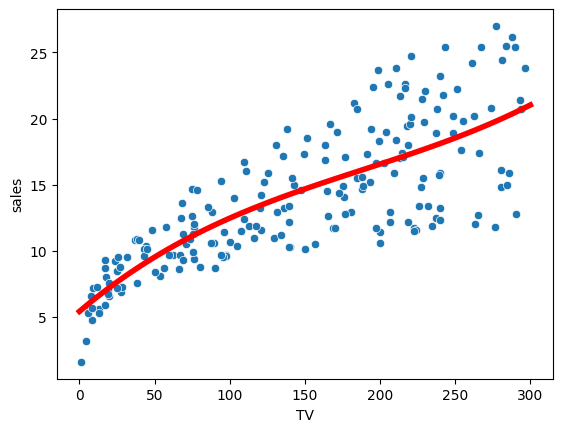

In [151]:
sns.scatterplot(df,x="TV",y="sales")
plt.plot(harcamalar, satis,c="red", lw=4)

In [152]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

In [153]:
# np.polyfit(X,y,3) yazarsak eğer 


""" HATA

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[29], line 1
----> 1 np.polyfit(X,y,3)

    635     raise ValueError("expected deg >= 0")
    636 if x.ndim != 1:
--> 637     raise TypeError("expected 1D vector for x")
    638 if x.size == 0:
    639     raise TypeError("expected non-empty vector for x")

TypeError: expected 1D vector for x


            BU ŞU DEMEK bilgisayar 1 boyutlu vektör bekliyor bizden yani sayilar istiyor matris istemiyor bu da artık poly işe yaramaz demek.
"""

' HATA\n\n---------------------------------------------------------------------------\nTypeError                                 Traceback (most recent call last)\nCell In[29], line 1\n----> 1 np.polyfit(X,y,3)\n\n    635     raise ValueError("expected deg >= 0")\n    636 if x.ndim != 1:\n--> 637     raise TypeError("expected 1D vector for x")\n    638 if x.size == 0:\n    639     raise TypeError("expected non-empty vector for x")\n\nTypeError: expected 1D vector for x\n\n\n            BU ŞU DEMEK bilgisayar 1 boyutlu vektör bekliyor bizden yani sayilar istiyor matris istemiyor bu da artık poly işe yaramaz demek.\n'

## Train test split

In [154]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

## Linear Model

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
model_linear = LinearRegression()

In [159]:
model_linear.fit(X_train,y_train)

LinearRegression()

In [160]:
pred_lin = model_linear.predict(X_test)

# PERFORMANS

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [162]:
mae = mean_absolute_error(y_test,pred_lin)
rmse = np.sqrt(mean_squared_error(y_test,pred_lin))

In [163]:
print("MAE : ", mae)
print("RMSE: ", rmse)

MAE :  1.1843918802048923
RMSE:  1.4355426289443445


In [164]:
res_lin = y_test - pred_lin

<Axes: xlabel='sales', ylabel='sales'>

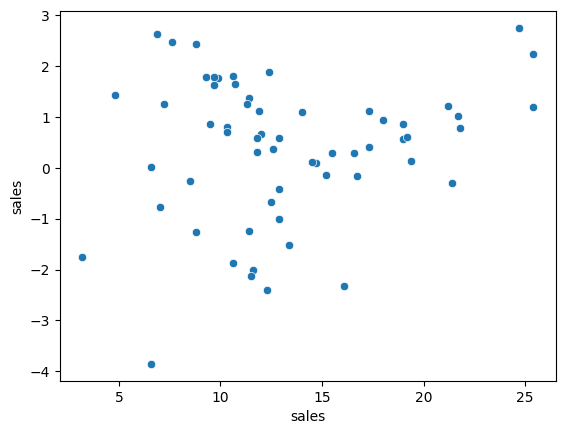

In [165]:
sns.scatterplot(x= y_test,y=res_lin)

<Axes: xlabel='sales', ylabel='Count'>

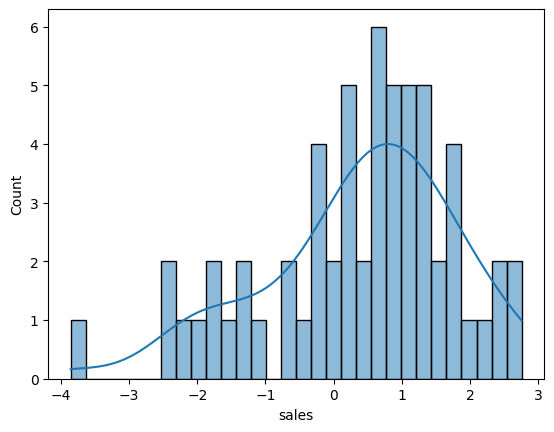

In [166]:
sns.histplot(res_lin,bins=30,kde=True)

## Final Lin Model

In [167]:
final_lin = LinearRegression()

In [168]:
final_lin.fit(X,y)

LinearRegression()

In [169]:
y_hat = final_lin.predict(X)

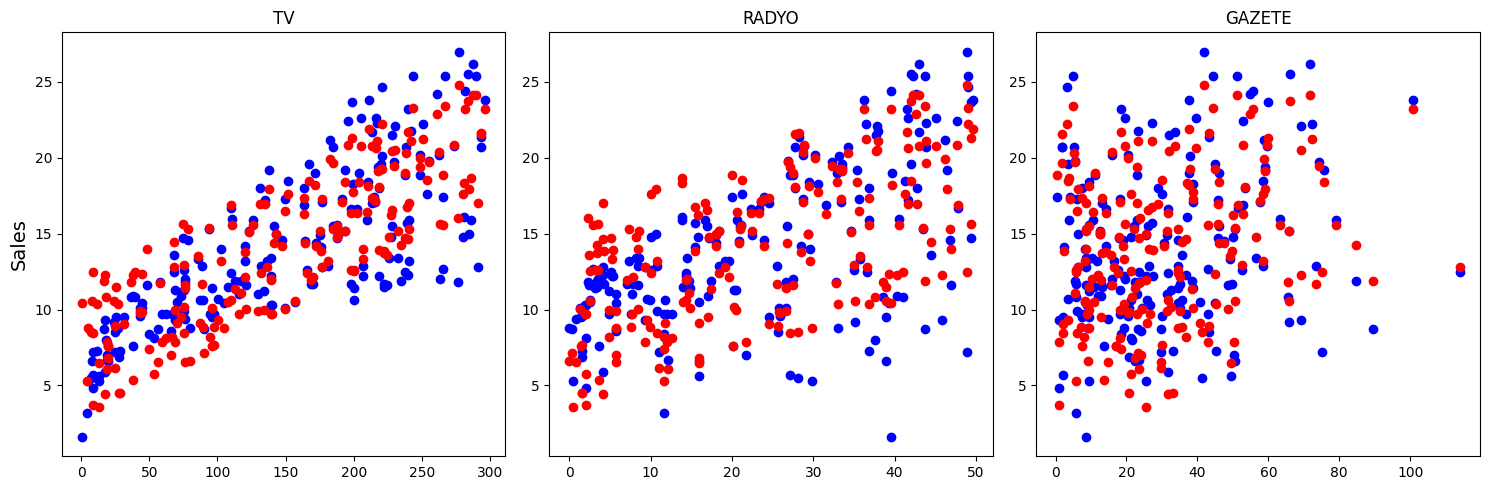

In [170]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="blue")
ax[0].plot(df["TV"], y_hat, "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="blue")
ax[1].plot(df["radio"], y_hat, "o", color="red")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].plot(df["newspaper"], y_hat, "o", color="red")
ax[2].set_title("GAZETE")

plt.tight_layout()


## Poly Model

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [172]:
poly_conv = PolynomialFeatures(degree=2, include_bias= False)

In [173]:
poly_feat = poly_conv.fit_transform(X)

In [174]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [175]:
poly_feat.shape

(200, 9)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

In [177]:
model_polinom = LinearRegression(fit_intercept=True)

In [178]:
model_polinom.fit(X_train,y_train)

LinearRegression()

In [179]:
pred_polinom = model_polinom.predict(X_test)

In [180]:
mae = mean_absolute_error(y_test,pred_polinom)
rmse = np.sqrt(mean_squared_error(y_test,pred_polinom))
r2 = r2_score(y_test,pred_polinom)

In [181]:
print(mae)
print(rmse)
print(r2)

0.46780549538380395
0.6106500340084754
0.9854852727113999


In [182]:
# %98 wow

## En iyi regresyon derecesi

In [183]:
train_rmse = []
test_rmse = []

for d in range(1,10):
    
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)

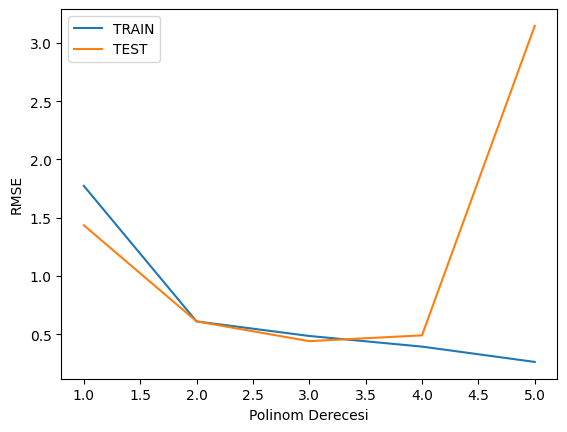

In [184]:
plt.plot(range(1,6),train_rmse[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse[:5],label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()

# !!! BURADA OVERFİTTİNG OLUŞUYOR 

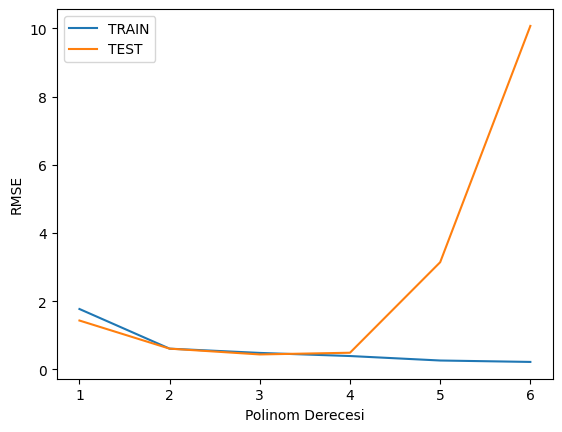

In [185]:
plt.plot(range(1,7),train_rmse[:6],label='TRAIN')
plt.plot(range(1,7),test_rmse[:6],label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()

Yukarıdaki bu grafikler şimdi ne alaka dersek durum şu ;
bizim için hangi polinom derecesi iyi sorulduğu zaman aslında şu cevabı vericez; Train ile test çizgilerinin kırıldığı nokta
yani 4. derece daha uygunmuş yorumunu yapabiliyoruz.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html 

overfitting durumu bu sitedeki grafikler üzerinden anlatmak gerekirse örneğin overfitting grafiğinde bütün noktaları bilmiş bu doğru ancak eğer biz veriye ekleme yaparsak yada farklı noktalar koyarsak ezber yapmaya başladığı için test split de muazzam hatalar verebilir (burada test splitin önemi de ayrı bir parantez) bu yüzden de bizim için makinenin %100 tahmin etmesi de iyi sonuç değil

# GÖRSELLEŞTİRME

In [186]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [187]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [188]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
poly_regr_final = LinearRegression()
poly_regr_final.fit(X_poly, y)

LinearRegression()

In [189]:
poly_regr_pred = poly_regr_final.predict(X_poly)

In [190]:
df["sales"].mean(), df["sales"].std()

(14.0225, 5.217456565710478)

In [191]:
mae = mean_absolute_error(y,poly_regr_pred)
rmse = np.sqrt(mean_squared_error(y,poly_regr_pred))
r2 = r2_score(y,poly_regr_pred)
print("MAE",mae)
print("RMSE",rmse)
print("R2",r2)

MAE 0.2740419414190066
RMSE 0.3777861270613361
R2 0.9947307203701946


bu yüzdelikler aslında makinenin artık overfitting yaptığını gösterebilir ama biz yapmadığını yukarıda çizdirdiğimiz grafikte 4.derecede kırılma yaşadığını bildiğimiz için overfitting olmadığını anlıyoruz.

In [192]:
sns.scatterplot(X["radio"], y=y, data=df, color='red')
plt.scatter(X["radio"], poly_regr_pred, color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.show()


TypeError: scatterplot() got multiple values for argument 'data'

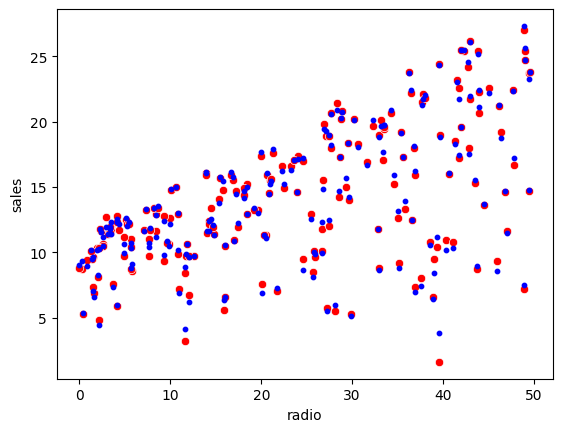

In [ ]:
sns.scatterplot(x="radio", y=y, data=df, color='red')
plt.scatter(X["radio"], poly_regr_pred, color='blue', s=10)

## Regresyon Eğrisi Görseli

In [ ]:
X = df[["TV"]] # iki köşeli parntez olmadan da çalıştır
y = df["sales"]

In [ ]:
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
poly_regr_3 = LinearRegression()
poly_regr_3.fit(X_poly, y)

LinearRegression()

In [ ]:
poly_pred_3 = poly_regr_3.predict(X_poly)

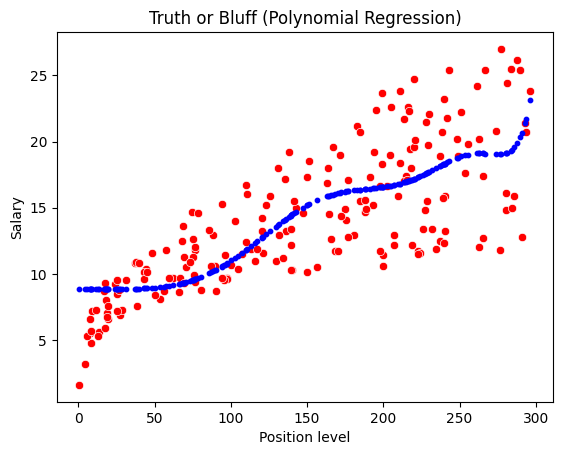

In [ ]:
sns.scatterplot(x=X["TV"], y=y, color='red')

# plt.scatter fonksiyonunu doğru değişkenlerle kullanın
plt.scatter(X["TV"], poly_pred_3, color='blue', s=10)

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
